In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from pathlib import Path

In [30]:
DATA_DIR = Path("./dataset_ready/train")
PARQUET_FILES = sorted(list(DATA_DIR.glob("*.parquet")))
print(f"Found {len(PARQUET_FILES)} parquet files.")

Found 1 parquet files.


In [31]:
df = pd.concat([pd.read_parquet(f) for f in PARQUET_FILES], ignore_index=True)
df.describe()

,game_result,game_phase,game_stage,stockfish_score_depth_10,stockfish_score_depth_20,stockfish_label_depth_20
count,4.607022e+06,4.607022e+06,4.607022e+06,4.607022e+06,4.607022e+06,4607022.0
mean,5.411004e-01,5.669554e-01,6.243541e-01,-5.405032e-01,-1.720528e-01,3.0
std,4.138350e-01,3.055814e-01,6.241310e-01,1.813260e+03,2.516666e+03,2.0
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+04,-1.000000e+04,0.0
25%,0.000000e+00,2.500000e-01,0.000000e+00,-3.190000e+02,-3.610000e+02,1.0
50%,5.000000e-01,5.833333e-01,1.000000e+00,0.000000e+00,0.000000e+00,3.0
75%,1.000000e+00,8.333333e-01,1.000000e+00,3.190000e+02,3.610000e+02,5.0
max,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+04,1.000000e+04,6.0


In [32]:
df.head()

,fen,game_result,game_phase,game_stage,is_check,stockfish_score_depth_10,stockfish_score_depth_20,stockfish_label_depth_20
0,r1b1kb1r/pp3ppp/q1nppn2/8/2B1P3/1NN1B3/PPP2PPP...,0.0,1.000000,0,False,654.0,582.0,0
1,Nk6/p3p1b1/6r1/6Kp/1P1PBPp1/2P5/1P3R1P/8 w - -...,0.0,0.291667,1,True,884.0,889.0,0
2,rnq2rk1/3bp1b1/pp1p1pBp/2pP2p1/P1N5/2P2NB1/1PQ...,1.0,0.958333,0,False,506.0,562.0,0
3,6R1/8/1K2pk2/2r2p1P/8/6P1/8/8 w - - 1 57,0.5,0.166667,1,False,600.0,870.0,0
4,4r1k1/p2q1pp1/1pB2n1p/1P2p3/3P4/P2P4/1Bn2PPP/3...,1.0,0.666667,0,False,616.0,767.0,0


In [33]:
print("Statistics for Stockfish Depth 20 Scores:")
df["stockfish_score_depth_20"].describe()

Statistics for Stockfish Depth 20 Scores:


count    4.607022e+06
mean    -1.720528e-01
std      2.516666e+03
min     -1.000000e+04
25%     -3.610000e+02
50%      0.000000e+00
75%      3.610000e+02
max      1.000000e+04
Name: stockfish_score_depth_20, dtype: float64

In [34]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
fen                         0
game_result                 0
game_phase                  0
game_stage                  0
is_check                    0
stockfish_score_depth_10    0
stockfish_score_depth_20    0
stockfish_label_depth_20    0
dtype: int64


In [35]:
df_no_mate = df[df["stockfish_score_depth_20"].between(-5000,5000)]
df_no_mate.describe()

,game_result,game_phase,game_stage,stockfish_score_depth_10,stockfish_score_depth_20,stockfish_label_depth_20
count,4.322179e+06,4.322179e+06,4.322179e+06,4.322179e+06,4.322179e+06,4.322179e+06
mean,5.414323e-01,5.812219e-01,5.956535e-01,9.240925e-01,9.699330e-01,2.999665e+00
std,4.120671e-01,3.047021e-01,6.174095e-01,3.808119e+02,4.388331e+02,1.915852e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-9.995000e+03,-5.000000e+03,0.000000e+00
25%,0.000000e+00,2.916667e-01,0.000000e+00,-2.960000e+02,-3.350000e+02,1.000000e+00
50%,5.000000e-01,5.833333e-01,1.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
75%,1.000000e+00,8.750000e-01,1.000000e+00,2.960000e+02,3.350000e+02,5.000000e+00
max,1.000000e+00,1.000000e+00,2.000000e+00,9.995000e+03,5.000000e+03,6.000000e+00


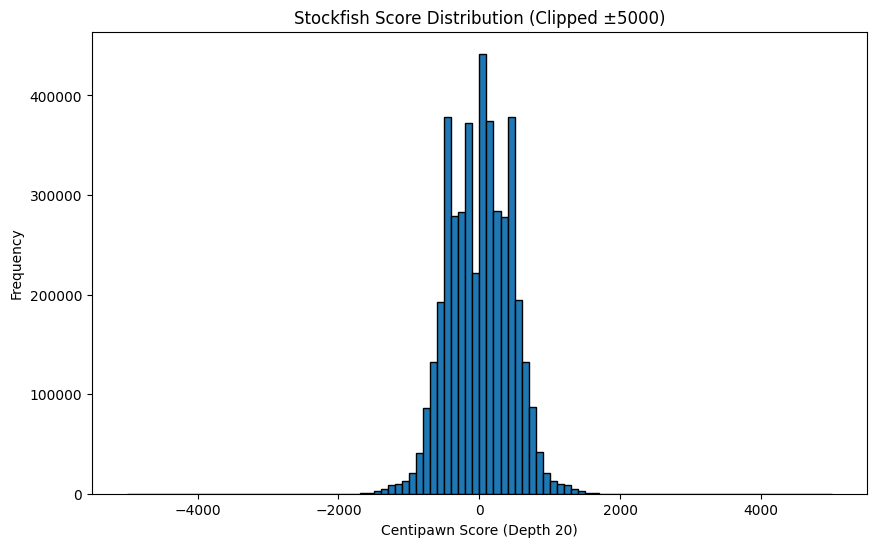

In [36]:
plt.figure(figsize=(10, 6))
plt.hist(df_no_mate["stockfish_score_depth_20"], bins=100, edgecolor='black')
plt.xlabel("Centipawn Score (Depth 20)")
plt.ylabel("Frequency")
plt.title("Stockfish Score Distribution (Clipped ±5000)")
plt.show()

In [37]:
lower_bound = df["stockfish_score_depth_20"].quantile(0.01)
upper_bound = df["stockfish_score_depth_20"].quantile(0.99)
print(f"Filtering data between {lower_bound:.1f} and {upper_bound:.1f} cp")
df_center = df[df["stockfish_score_depth_20"].between(lower_bound, upper_bound)]
df_center.describe()


Filtering data between -9997.0 and 9997.0 cp


,game_result,game_phase,game_stage,stockfish_score_depth_10,stockfish_score_depth_20,stockfish_label_depth_20
count,4.527680e+06,4.527680e+06,4.527680e+06,4.527680e+06,4.527680e+06,4.527680e+06
mean,5.410713e-01,5.691645e-01,6.202517e-01,-1.782443e-01,2.047218e-01,2.999886e+00
std,4.133579e-01,3.063265e-01,6.252019e-01,1.270035e+03,2.166266e+03,1.977974e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-9.998000e+03,-9.997000e+03,0.000000e+00
25%,0.000000e+00,2.500000e-01,0.000000e+00,-3.130000e+02,-3.540000e+02,1.000000e+00
50%,5.000000e-01,5.833333e-01,1.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
75%,1.000000e+00,8.333333e-01,1.000000e+00,3.130000e+02,3.540000e+02,5.000000e+00
max,1.000000e+00,1.000000e+00,2.000000e+00,9.997000e+03,9.997000e+03,6.000000e+00


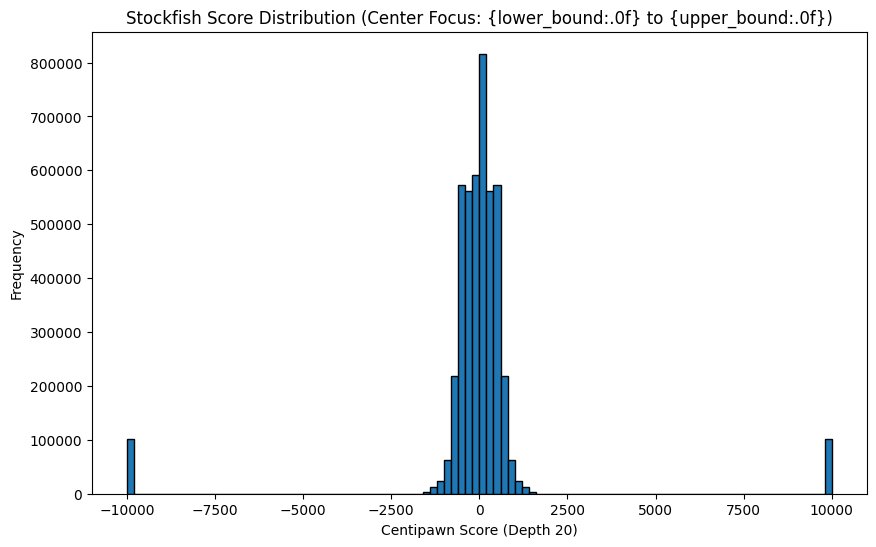

In [38]:
plt.figure(figsize=(10, 6))
plt.hist(df_center["stockfish_score_depth_20"], bins=100, edgecolor='black')
plt.xlabel("Centipawn Score (Depth 20)")
plt.ylabel("Frequency")
plt.title("Stockfish Score Distribution (Center Focus: {lower_bound:.0f} to {upper_bound:.0f})")
plt.show()

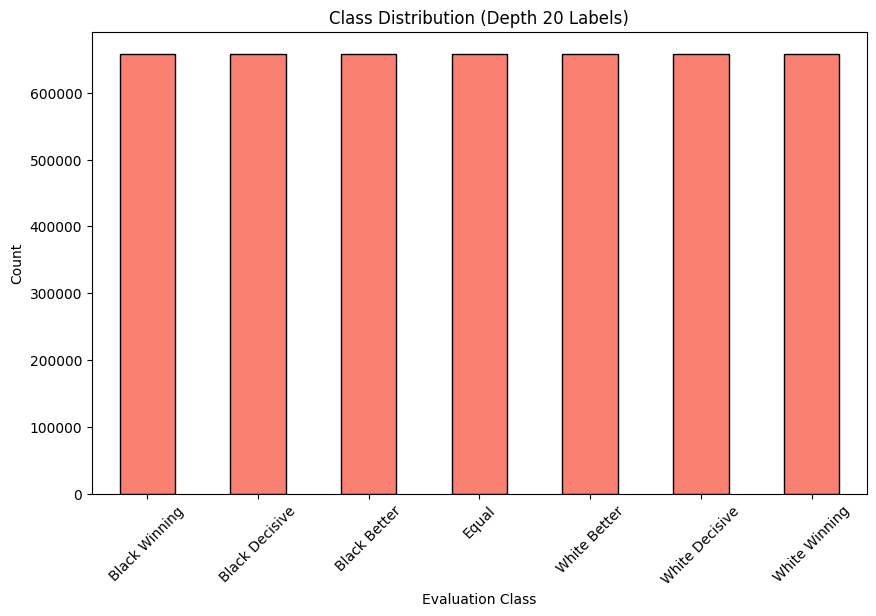

In [39]:
label_map = {
    0: "White Winning",
    1: "White Decisive",
    2: "White Better",
    3: "Equal",
    4: "Black Better",
    5: "Black Decisive",
    6: "Black Winning"
}

counts = df["stockfish_label_depth_20"].value_counts().sort_index()
counts = counts.iloc[::-1]
plt.figure(figsize=(10, 6))
counts.plot(kind="bar", color='salmon', edgecolor='black')
plt.xticks(ticks=range(len(counts)), 
           labels=[label_map.get(i, i) for i in counts.index], 
           rotation=45)

plt.xlabel("Evaluation Class")
plt.ylabel("Count")
plt.title("Class Distribution (Depth 20 Labels)")
plt.show()


In [40]:
exact_counts = counts.rename(index=label_map)
print(exact_counts)

stockfish_label_depth_20
Black Winning     658146
Black Decisive    658146
Black Better      658146
Equal             658146
White Better      658146
White Decisive    658146
White Winning     658146
Name: count, dtype: int64


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

file_path = Path("./dataset_processed_clean_split/chess_bitboard_train.npz")

with np.load(file_path) as data:
    X_train = data['X']

pieces_per_position = np.sum(X_train, axis=1)

print(f"Min pieces on board: {pieces_per_position.min()}")
print(f"Max pieces on board: {pieces_per_position.max()}")
print(f"Avg pieces on board: {pieces_per_position.mean():.2f}")

plt.figure(figsize=(10, 5))
plt.hist(pieces_per_position, bins=range(0, 34), color='teal', edgecolor='black', alpha=0.7)
plt.title("Distribution of Active Pieces (Bitboard Population)")
plt.xlabel("Number of Pieces on Board")
plt.ylabel("Count")
plt.axvline(32, color='red', linestyle='--', label='Max Pieces (32)')
plt.legend()
plt.show()

In [ ]:
files = [
    Path("./dataset_processed_clean_split/chess_bitboard_train.npz"),
    Path("./dataset_processed_clean_split/chess_bitboard_val.npz"),
    Path("./dataset_processed_clean_split/chess_bitboard_test.npz")
]

total_even = 0
total_odd = 0
total_positions = 0

print(f"{'Dataset':<10} | {'Total':<10} | {'Even':<10} | {'Odd':<10} | {'Even %':<8} | {'Odd %':<8}")
print("-" * 75)

for file_path in files:
    try:
        split_name = file_path.stem.split('_')[-1].capitalize()  # e.g., "Train", "Val"
        
        with np.load(file_path) as data:
            # Load data (assuming key is 'X' based on your previous code)
            X = data['X']
            
            # Calculate pieces per position
            pieces_per_position = np.sum(X, axis=1)
            
            # Count
            count_even = np.sum(pieces_per_position % 2 == 0)
            count_odd = np.sum(pieces_per_position % 2 != 0)
            total = len(pieces_per_position)
            
            # Add to grand totals
            total_even += count_even
            total_odd += count_odd
            total_positions += total
            
            # Print row for this file
            print(f"{split_name:<10} | {total:<10,} | {count_even:<10,} | {count_odd:<10,} | {count_even/total:.1%}   | {count_odd/total:.1%}")

    except FileNotFoundError:
        print(f"Error: Could not find {file_path}")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

print("-" * 75)
# Print Grand Total
print(f"{'ALL':<10} | {total_positions:<10,} | {total_even:<10,} | {total_odd:<10,} | {total_even/total_positions:.1%}   | {total_odd/total_positions:.1%}")